In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
data = pd.read_excel('TDS_202017_20Data-WEBPAGE.xlsx', sheet_name='Data')
legend = pd.read_excel('TDS_202017_20Data-WEBPAGE.xlsx', sheet_name='Data Dictionary')

In [11]:
print(data.columns)

Index(['*RESPNUM', 'Q2', 'Q3', 'Trips', 'Q4TOT', 'Q5TOT', 'Q4aP', 'Q4bP',
       'Q4cP', 'Q4dP',
       ...
       'Q29', 'Q30', 'SAMPLETYPE', 'LANG', 'ZONE', 'Interview_Date',
       'Interview_Day', 'DRVRFLAG', 'AGECO', 'WEIGHT'],
      dtype='object', length=184)


In [104]:
# get SF zip codes 

s = legend[legend['Field']== 'Q25A-SF']['Codes']
zips = s.iloc[0]
zlst = zips.split('\n')
zdict = {}
for code in zlst:
    i, j = code.split('=')
    try:
        zdict[int(i)]=int(j)
    except:
        zdict[int(i)]=j
print(zdict)

{1: 94102, 2: 94103, 3: 94104, 4: 94105, 5: 94107, 6: 94108, 7: 94109, 8: 94110, 9: 94111, 10: 94112, 11: 94114, 12: 94115, 13: 94116, 14: 94117, 15: 94118, 16: 94121, 17: 94122, 18: 94123, 19: 94124, 20: 94127, 21: 94128, 22: 94129, 23: 94130, 24: 94131, 25: 94132, 26: 94133, 27: 94134, 28: 94158, 29: 94188, 30: 'Refused '}


In [41]:
# for now let's just rename a few columns we'll definitely want to look at 
data.rename(columns={'Q25A-SF':'zip_sf', 'Q25A-NSF':'zip_nsf', 'Q29':'income', 'Q27':'age'}, inplace=True)

In [48]:
# figure out what happened to empty cells 
d = data.iloc[0]['zip_sf']
print(type(d))
d is np.NaN

<class 'numpy.float64'>


False

count    401.000000
mean      14.164589
std        7.814592
min        1.000000
25%        8.000000
50%       14.000000
75%       19.000000
max       30.000000
Name: zip_sf, dtype: float64


/home/rika/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


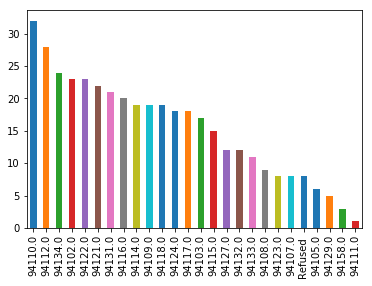

In [114]:
# split into SF and nonSF responder dataframes 
# SF responders 
sf_resp = data[data['zip_sf'].notnull()]
print(sf_resp['zip_sf'].describe())
sf_resp['zip_sf'].tail()
# map number codes to zip codes 
sf_resp['zip_sf'].replace(zdict, inplace=True)
sf_resp['zip_sf'].tail()
sf_resp['zip_sf'].value_counts().plot(kind='bar')

In [115]:
print(sf_resp['zip_sf'].value_counts())

94110.0     32
94112.0     28
94134.0     24
94102.0     23
94122.0     23
94121.0     22
94131.0     21
94116.0     20
94114.0     19
94109.0     19
94118.0     19
94124.0     18
94117.0     18
94103.0     17
94115.0     15
94127.0     12
94132.0     12
94133.0     11
94108.0      9
94123.0      8
94107.0      8
Refused      8
94105.0      6
94129.0      5
94158.0      3
94111.0      1
Name: zip_sf, dtype: int64


In [112]:
# nonSF responders... how many different zipcodes are there? 
# note, 99999 means Refused/don't know 
nsf_resp = data[data['zip_nsf'].notnull()]
print(nsf_resp['zip_nsf'].describe())
nsf_resp['zip_nsf'].tail()
nsf_zips = set([int(i) for i in nsf_resp['zip_nsf']])
nsf_resp['zip_nsf'].value_counts()

count      403.000000
mean     94761.014888
std       1095.721367
min      94002.000000
25%      94401.000000
50%      94563.000000
75%      94903.500000
max      99999.000000
Name: zip_nsf, dtype: float64


99999.0    15
94014.0    13
94080.0    11
94941.0    10
94066.0     8
94010.0     8
94044.0     7
94501.0     7
94403.0     6
94523.0     6
94061.0     6
94925.0     6
94609.0     6
94608.0     6
94558.0     6
94804.0     6
94564.0     5
94015.0     5
94947.0     5
94901.0     5
94591.0     5
94513.0     5
94520.0     5
94404.0     5
94611.0     5
94553.0     4
94587.0     4
94563.0     4
94560.0     4
94965.0     4
           ..
95133.0     1
94018.0     1
94559.0     1
94545.0     1
94019.0     1
95403.0     1
94603.0     1
94517.0     1
95401.0     1
95124.0     1
94705.0     1
94612.0     1
94065.0     1
94105.0     1
94582.0     1
94805.0     1
94505.0     1
95127.0     1
94124.0     1
95694.0     1
94949.0     1
94043.0     1
94539.0     1
94588.0     1
94506.0     1
95134.0     1
94509.0     1
94586.0     1
94507.0     1
94538.0     1
Name: zip_nsf, Length: 156, dtype: int64